## Making Statistical Inferences

### Hypothesis testing:

Hypothesis testing is used to help make a judgment about a claim addressing the question, ‘can the observed differences be attributed to chance?’

### Continuous Outcome Data

Problem: Can we conclude patients with primary hypertension (PH), on average, have a higher
total cholesterol level than normotensive (NT) patients? 

Data: A random sample of patients was taken. Total cholesterol measurements (mg/dl) for 133 PH patients (Group 1) and 41 NT patients (Group 2) were reported.

In [2]:
Example_1=read.csv("Dataset1.csv", sep=",", header=T)
colnames(Example_1)<-c("Cholesterol", "Group")
#Example_1

Is this about averages?

Is our sample random?

Is this paired or independent sample data?

Does this data come from a normal or approximately normal distribution?

Remember CLT! 

In [3]:
#n1=133
n1=length(Example_1[Example_1[,2]==1,][,2])
n1
#n2=41
n2=length(Example_1[Example_1[,2]==2,][,2])
n2

[1] 133

[1] 41

Both are greater than 30, so CLT applies

### Check Assumptions: histograms and normal probability plots

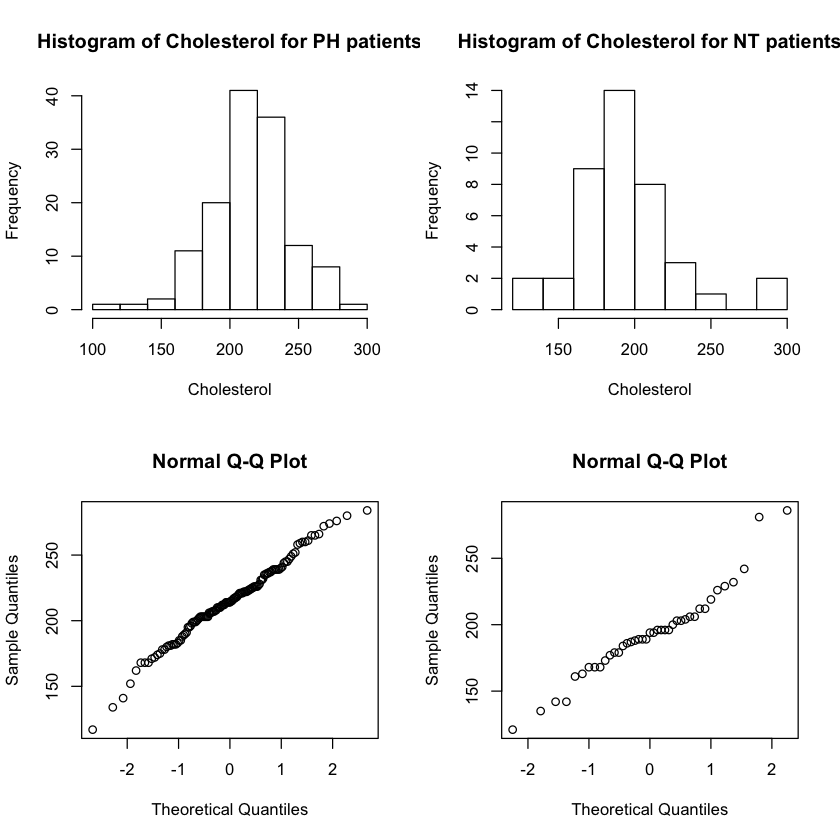

In [4]:
par(mfrow=c(2,2))
hist(Example_1[Example_1[,2]==1,][,1], main="Histogram of Cholesterol for PH patients", xlab="Cholesterol")
hist(Example_1[Example_1[,2]==2,][,1], main="Histogram of Cholesterol for NT patients", xlab="Cholesterol")
qqnorm(Example_1[Example_1[,2]==1,][,1])
qqnorm(Example_1[Example_1[,2]==2,][,1])

### Check Assumptions: variances equal?

[1] 29.65064

[1] 33.04483


	F test to compare two variances

data:  Example_1$Cholesterol by Example_1$Group
F = 0.80512, num df = 132, denom df = 40, p-value = 0.3639
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4689967 1.2900776
sample estimates:
ratio of variances 
         0.8051205 


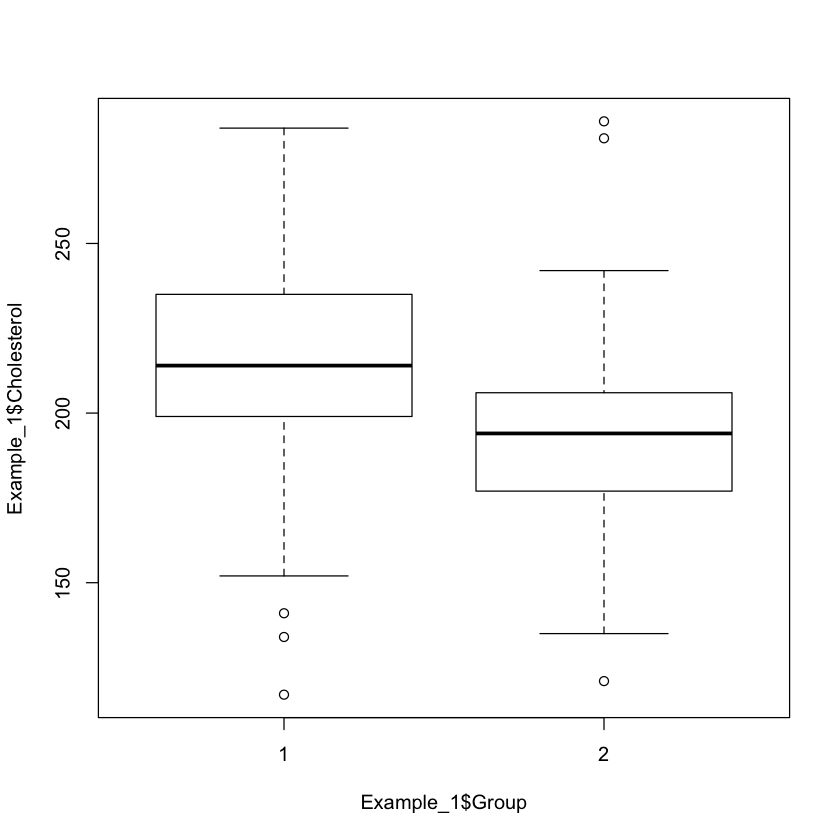

In [6]:
par(mfrow=c(1,1))
boxplot(Example_1$Cholesterol~Example_1$Group)
sqrt(var(Example_1[Example_1[,2]==1,][,1]))
sqrt(var(Example_1[Example_1[,2]==2,][,1]))

res.ftest <- var.test(Example_1$Cholesterol~Example_1$Group)
res.ftest

### State hypotheses:

Can we conclude patients with primary hypertension (PH), on average, have a higher
total cholesterol level than normotensive (NT) patients? 

$H_0:\mu_{ph}=\mu_{nt}$

$H_a: \mu_{ph} > \mu_{nt}$


In [7]:
# Test with equal variances
T1=t.test(Example_1$Cholesterol~Example_1$Group, alternative="greater", var.equal=T)
T1
# What if our samples had unequal variances?
T2=t.test(Example_1$Cholesterol~Example_1$Group, alternative="greater", var.equal=F)
T2


	Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.9531, df = 172, p-value = 5.624e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 12.51683      Inf
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 



	Welch Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.7323, df = 61.178, p-value = 0.0002091
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 11.88959      Inf
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 


In [8]:
?t.test

Our test statistic is t=3.953 with df=172 and a p-value of .0000562.  

This p-value is very small, so we reject $H_0$ and say that the true difference in the means of cholesterol between PH and NT patients is greater than 0.  

OR, we could say: The true mean of PH patient's cholesterol is greater than the true mean of NT patient's cholesterol.

The mean difference between PH and NT patients has a 95% confidence interval of (12.417, infinity) 
    * (remember: it is infinity because it is a one-sided test)

## some other alternative hypotheses: how a p-value is calculated
### $H_A: \mu_{ph} < \mu_{nt}$

In [9]:
t.test(Example_1$Cholesterol~Example_1$Group, alternative="less", var.equal=T)
##note: 
1-T1$p.value


	Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.9531, df = 172, p-value = 0.9999
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
    -Inf 30.5215
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 


[1] 0.9999438

### $H_A: \mu_{ph} \neq \mu_{nt}$

In [10]:
t.test(Example_1$Cholesterol~Example_1$Group, alternative="two.sided", var.equal=T)
2*T1$p.value
#Note: Since this is a two-sided test, the 95% confidence interval is bounded by two sides--(10.77, 32.26)


	Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.9531, df = 172, p-value = 0.0001125
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.77439 32.26394
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 


[1] 0.0001124891

## Categorical Outcome Data

If samples of a standard pool of cytomegalovirus are inoculated into shell vials and these vials are then randomly processed either with or without centrifugation,
the groups of vials are independent of one another and the results of the experiment [citation](https://journals.asm.org/doi/abs/10.1128/cmr.3.3.219):

In [11]:
##create 2x2 table
Example_2<-as.table(matrix(c(20,10,30,40), nrow=2, ncol=2, dimnames=list(c("Centrifuged", "Noncentrifuged" ),c("Growth:Yes", "Growth:No"))))


###tables can also be created from individual data using the function table()
Example_2

##H0: no association between growth and centrifugation in the population; p1-p2=0
##Ha: association between growth and centrifugation the population p1-p2!=0

#incidence of combined morbidity index
n1=Example_2[1,2]+Example_2[1,1]
n2=Example_2[2,1]+Example_2[2,2]
incidence_centrifuged=Example_2[1,1]/n1  ####p1
incidence_noncentrifuged=Example_2[2,1]/n2  ####p2
incidence_centrifuged
incidence_noncentrifuged


               Growth:Yes Growth:No
Centrifuged            20        30
Noncentrifuged         10        40

[1] 0.4

[1] 0.2

In [12]:
###Chi-square test
Test_2=chisq.test(Example_2, correct=F)
Test_2
#often times, we use something called continuity correction when we are using a continuous function (like the Chi-square) to approximate a discrete function (like binomial)
# to enable continuity correction, change Test=chisq.test(Ex1, correct=T)


	Pearson's Chi-squared test

data:  Example_2
X-squared = 4.7619, df = 1, p-value = 0.0291


In [13]:
####check assumptions, expected count at least 80% of cells >5: 
Test_2$expected
#all cells are greater than 5

#df=(r-1)*(c-1)=(2-1)*(2-1)=1
#Test statistic=4.7619
#p-value is P(X^2>7.101)=.0291
#this p-value can also be found this way: 1-pchisq(4.7619,1)


,Growth:Yes,Growth:No
Centrifuged,15,35
Noncentrifuged,15,35


Here our p-value is smaller, so we reject $H_0$ and say there is an association 
between growth and centrifugation.



### Example: Small Counts

Problem: Sodium polystyrene in sorbitol is suspected of causing an adverse reaction leading to colonic necrosis.  Is there an association between drug and colonic necrosis in the population?

Data: A study compared the incidence of colonic necrosis in 117 Kayexelate-exposed and 862
nonexposed postsurgical patients.  Two cases occurred in the kayexelate-exposed group (Group 1); No cases occurred in the nonexposed group

Example Kayexelate and colonic necrosis: one-sided test (Basic Biostatistics: Statistics for Public Health Practice 17.3)


In [14]:
##create 2x2 table
Example_3<-as.table(matrix(c(2,0,115,862), nrow=2, ncol=2, dimnames=list(c("Group1:exposed", "Group2:unexposed "), c("Colonic Necrosis", "No Colonic Necrosis" ))))
Example_3

                  Colonic Necrosis No Colonic Necrosis
Group1:exposed                   2                 115
Group2:unexposed                 0                 862

In [15]:
###incidence estimates
n1=Example_3[1,2]+Example_3[1,1]
n2=Example_3[2,1]+Example_3[2,2]
incidence_exposed=Example_3[1,1]/n1  ####p1
incidence_unexposed=Example_3[2,1]/n2  ####p2
incidence_exposed
incidence_unexposed

##H0: no association between drug and colonic necrosis in the population; p1-p2=0
##Ha: association between drug and colonic necrosisin the population p1-p2 >0


[1] 0.01709402

[1] 0

In [16]:
####check assumptions, expected count at least 80% of cells >5: 
Test_3=chisq.test(Example_3)
Test_3$expected


Warning message in chisq.test(Example_3):
“Chi-squared approximation may be incorrect”

,Colonic Necrosis,No Colonic Necrosis
Group1:exposed,0.2390194,116.761
Group2:unexposed,1.7609806,860.239


In [17]:
###two cells <5...use fisher exact
Test_3=fisher.test(Example_3, alternative="greater")
Test_3


	Fisher's Exact Test for Count Data

data:  Example_3
p-value = 0.01417
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 2.132119      Inf
sample estimates:
odds ratio 
       Inf 


In [ ]:
?fisher.test

p-value=.014, which is small, so we reject $H_0$ and say that there is an adverse association 
between drug and colonic necrosisin the population.

There is a difference in the proportions of colonic necrosis between those exposed 
to the drug and those not. The evidence is strong that those exposed to the drug versus 
those that are not are not equally likely to have colonic necrosis.

### Example: Paired Data

Example Smoking and Mortality in Matched Data (Basic Biostatistics: Statistics for Public Health Practice 18.6)

Problem: Smoking was first suspected as causing premature mortality.  The hypothesis is that people who are genetically disposed to risk taking and adverse health outcomes were more likely to smoke, and hence more likely to experience premature death. 

Data: 22 smoking-discordant monozygotic twins were studies to see which twin first succumbed to death.  The smoking-twin died first in 17 pairs and non-smoking died first in 5 instances


In [18]:
###create 2x2 table
Example_4<-as.table(matrix(c(0,5,17,0), nrow=2, ncol=2, dimnames=list(c("Yes Died Smoking Twin", "No Died Smoking Twin "), c("Yes Died Non-Smoking Twin", "No Died Non-Smoking Twin" ))))
###tables can also be created from individual data using the function table()
###Normal Approximation Method: McNemar 
##H0: no association between smoking and earlier mortality in the population; 
##marginal probabilities for each outcome are the same p_a+p_b=p_c+p_d
##Ha: association between smoking and earlier mortality in the population
Example_4

                      Yes Died Non-Smoking Twin No Died Non-Smoking Twin
Yes Died Smoking Twin                         0                       17
No Died Smoking Twin                          5                        0

In [19]:
#Check assumption b+c>20: 5+17>20 
##without continuity correction
mcnemar.test(Example_4, correct=F)
#with continuity correction
mcnemar.test(Example_4, correct=T)


	McNemar's Chi-squared test

data:  Example_4
McNemar's chi-squared = 6.5455, df = 1, p-value = 0.01052



	McNemar's Chi-squared test with continuity correction

data:  Example_4
McNemar's chi-squared = 5.5, df = 1, p-value = 0.01902


In [20]:
#Test statistic: X^2=5.5
#df=1
#p-value=.01902
#same as
1-pchisq(5.5,1)
#1-P(X^2<5.5)=P(X^2>5.5)

[1] 0.01901647

So, we reject $H_0$ and say that there is an association between smoking and earlier mortality 
in the population.  The proportions of Dead Smoking twin and Dead non-smoking twin are different. 

### Using Binomial Exact Method

In [21]:
##H0: no association between smoking and earlier mortality in the population; 
#marginal probabilities for each outcome are the same p_a+p_b=p_c+p_d
##Ha: association between smoking and earlier mortality in the population

#number of discordant pairs n=17+5 Bernouilli Trials
n=Example_4[1,2]+Example_4[2,1]
n
###proportion of positive discordancies
p=Example_4[1,2]/n
p
###number of successes
x=Example_4[1,2]
x

[1] 22

[1] 0.7727273

[1] 17

In [22]:
###binomial test
binom.test(x,n, alternative=c("two.sided"))


	Exact binomial test

data:  x and n
number of successes = 17, number of trials = 22, p-value = 0.0169
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5462964 0.9217937
sample estimates:
probability of success 
             0.7727273 


Based on our sample data, we are 95% confident that the true difference of proportions is between .5463 and .9218.
p-value=.0169 which is slightly smaller than our chi-square approximation in McNemar's test.

## What if your data is not normal?

Many distributions in microbiology,such as colony counts and radioactivity counts, are very skewed. This violates the t-test assumptions.

    1. Mathematical transformation (e.g. logarithmic for non-negative and non-zero distributions)
    2. Non-parametric equivalents
    
### Example: Paired Data (Two Dependent Groups) using a Non-parametric test Wilcoxon Signed - Rank Test
#### Comparison of Bacteria on Pairs of Cloths and Sponges Sampled on 10 Occasions 

Given  the  structural  and  compositional  differences  between  cloths  and  sponges,  a  study  was designed to  investigate  if  one  material  provided  a  more  favorable  environment  for  bacterial  survival  than  the  other. Data on the number of bacteria were collected on a cloth and sponge on each of 10 separate occasions. We do not have 2 independent samples. In this case, there is a connection between a particular cloth and sponge in that the data for each  pair  were  collected  on  a  specific  occasion. [citation](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470905173)


In [23]:
Occasion<-c(seq(1,10,1),seq(1,10,1))

Cloth<-c(1*10^4,3.3*10^7,5.7*10^7,1.9*10^7,1.2*10^4,8.8*10^2,2.6*10^6,3.3*10^7,8.7*10^6,7.6*10^7 )
Sponge<-c(4.6*10^6,9.8*10^7,1.3*10^8,1.3*10^8,6.0*10^2,4.7*10^7,1.4*10^8,1.2*10^8,2.1*10^8,1.1*10^8 )
Df2<-cbind(Occasion, Cloth, Sponge)
colnames(Df2)<-c("Occasion", "Cloth", "Sponge")
Df2

Occasion,Cloth,Sponge
1,1.0e+04,4.6e+06
2,3.3e+07,9.8e+07
3,5.7e+07,1.3e+08
4,1.9e+07,1.3e+08
5,1.2e+04,6.0e+02
6,8.8e+02,4.7e+07
7,2.6e+06,1.4e+08
8,3.3e+07,1.2e+08
9,8.7e+06,2.1e+08
10,7.6e+07,1.1e+08


In [24]:
wilcox.test(Cloth,Sponge, data=Df2,paired=TRUE)


	Wilcoxon signed rank test

data:  Cloth and Sponge
V = 1, p-value = 0.003906
alternative hypothesis: true location shift is not equal to 0


Interpretation: We can conclude that the number of bacteria on sponges is significantly different from the bacteria on cloths with a p-value = 0.0039.

## What about ordinal data? 

We have two independent groups or cultures randomly treated with and without cycloheximide. The growth of Chlamydia trachomatis can be categorized only subjectively (blinded) as 1 = no growth, 2 = minimal growth, 3 = moderate growth, and 4 = confluent growth. The results are as follows:

In [25]:
Example_5<-as.table(matrix(c(10,20,15,15,15,10,10,5), nrow=2, ncol=4, dimnames=list(c("Yes", "No"), c("1 = no growth", "2 = minimal growth","3 = moderate growth","4 = confluent growth" ))))
Example_5


    1 = no growth 2 = minimal growth 3 = moderate growth 4 = confluent growth
Yes            10                 15                  15                   10
No             20                 15                  10                    5

In [26]:
# Let's turn this into a dataset!
Growth<-c(rep(1,10), rep(2,15), rep(3,15), rep(4,10),rep(1,20), rep(2,15), rep(3,10), rep(4,5))
CultureGroups<-c(rep('Yes',50), rep('No',50))
Df<-as.data.frame(cbind(as.numeric(Growth),CultureGroups))
colnames(Df)<-c('Growth', 'CultureGroups')

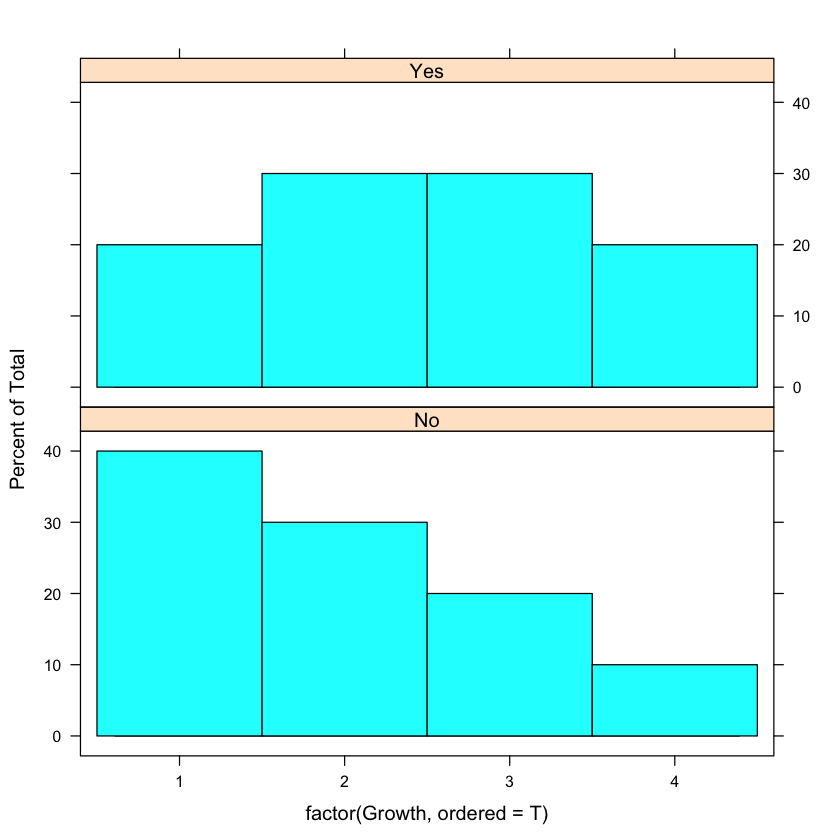

In [27]:
library(lattice)

histogram(~ factor(Growth, ordered=T) | CultureGroups,
          data=Df,
          layout=c(1,2)      #  columns and rows of individual plots
          )

#### Wilcoxon rank sum test (Mann Whitney U test):
Assumptions:
    
    1. All the observations from both groups are independent of each other
    2. The responses are at least ordinal
    3. Under the null hypothesis $H_0$, the distributions of both populations are equal
    4. The alternative hypothesis $H_a$ is that the distributions are not equal.
    
[Good explanation](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html)
    
    
#### Our Alternative Hypothesis: The growth of those treated with cycloheximide is significantly different than those not treated

In [28]:
wilcox.test(as.numeric(Growth)~CultureGroups, data=Df)


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(Growth) by CultureGroups
W = 912.5, p-value = 0.01583
alternative hypothesis: true location shift is not equal to 0


We can reject the null hypothesis and say that the differences between Growth for those treated with and without cycloheximide are significantly different.

ANOVA: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-anova/bs704_hypothesistesting-anova_print.html